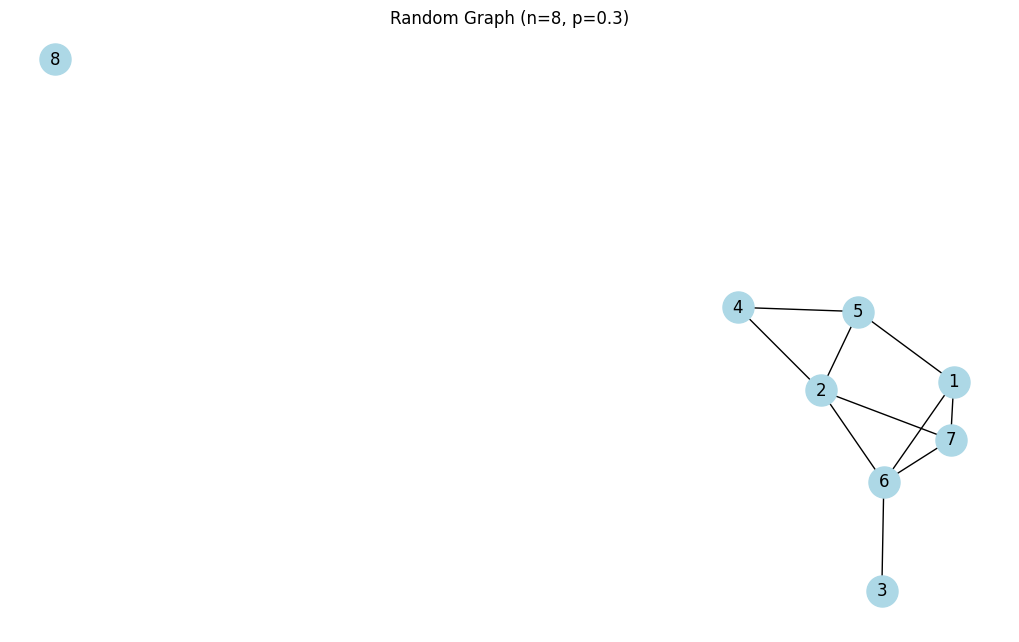

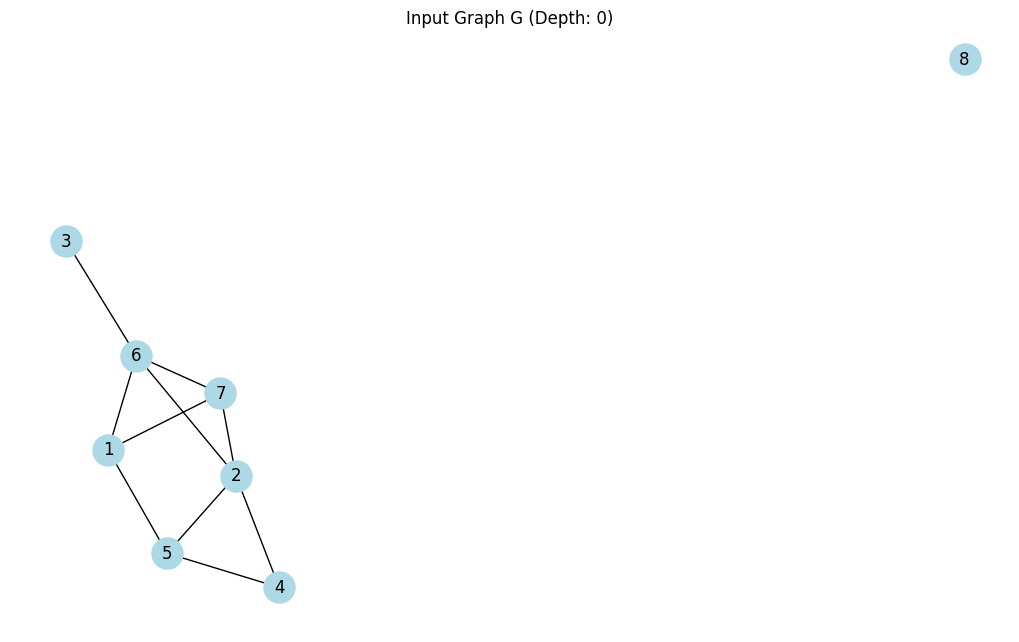

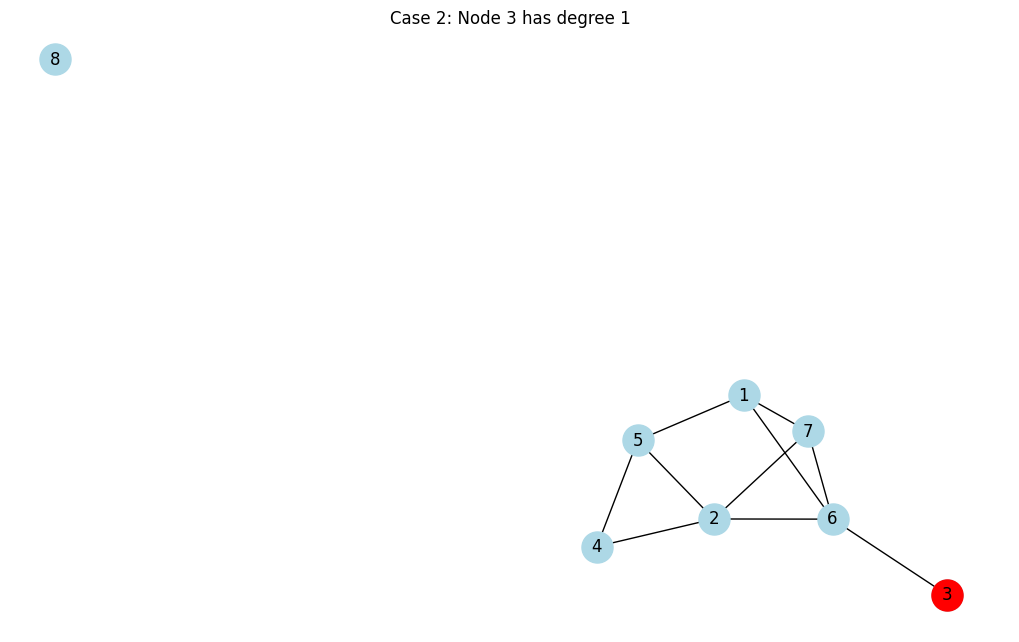

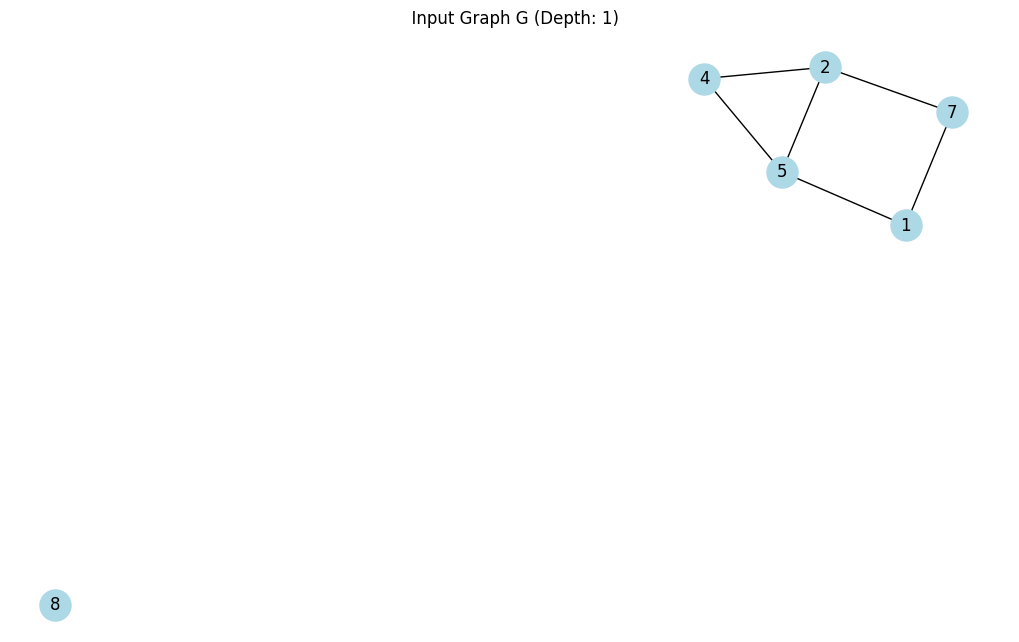

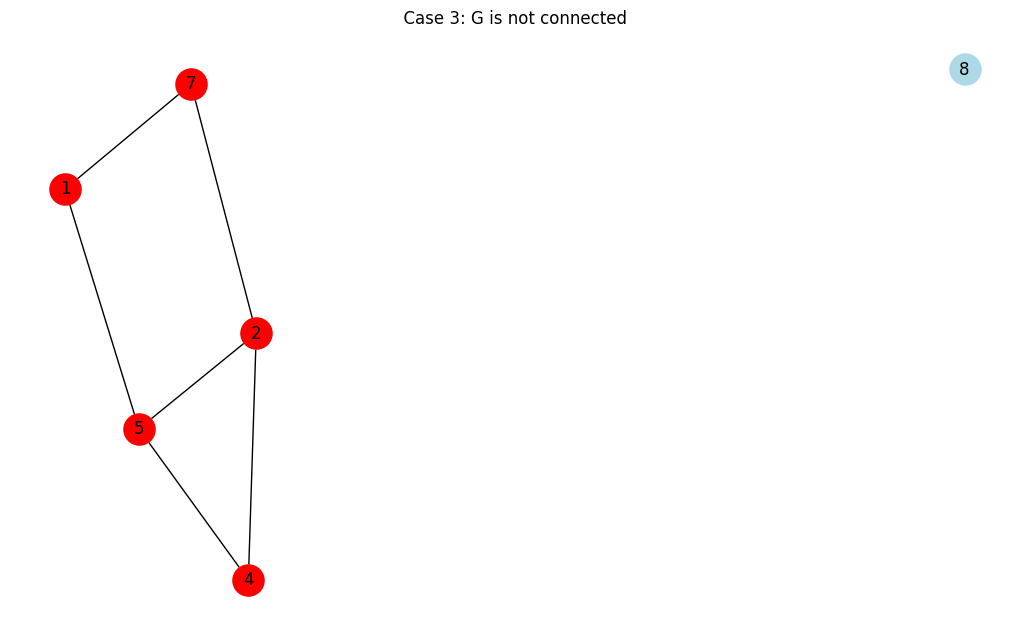

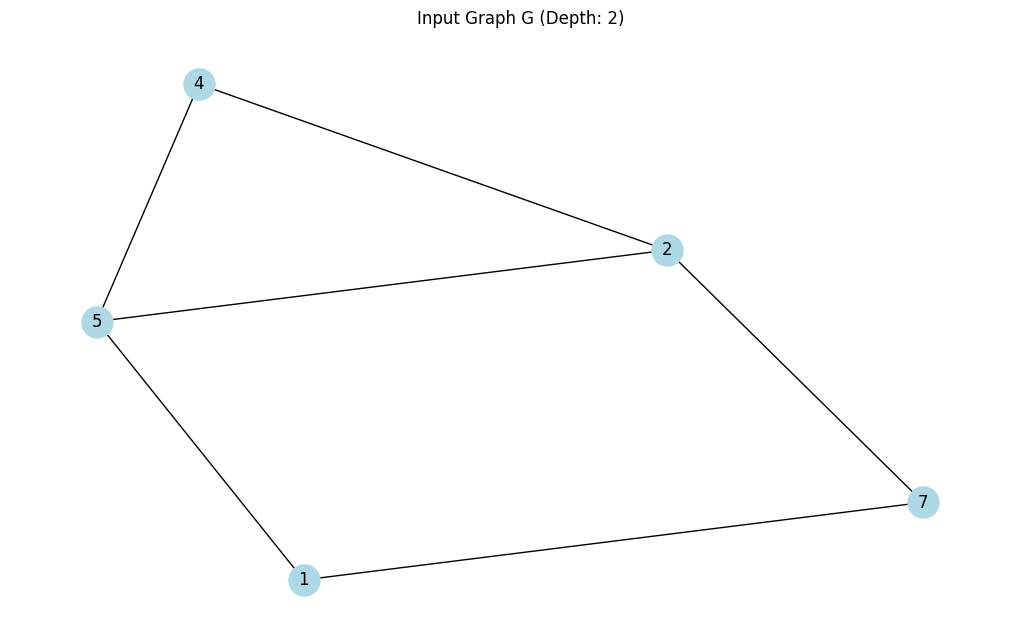

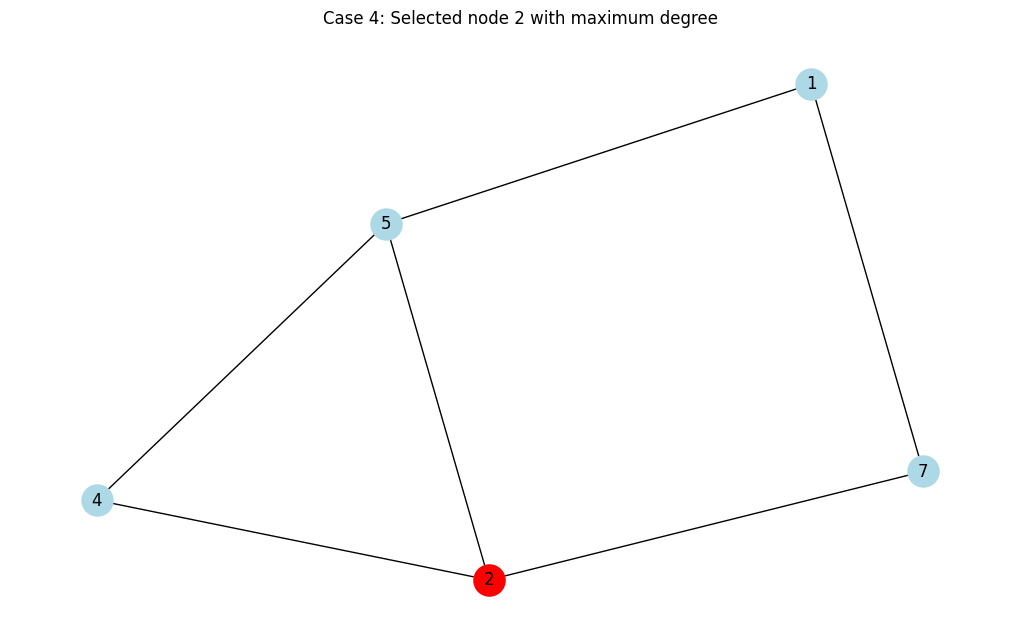

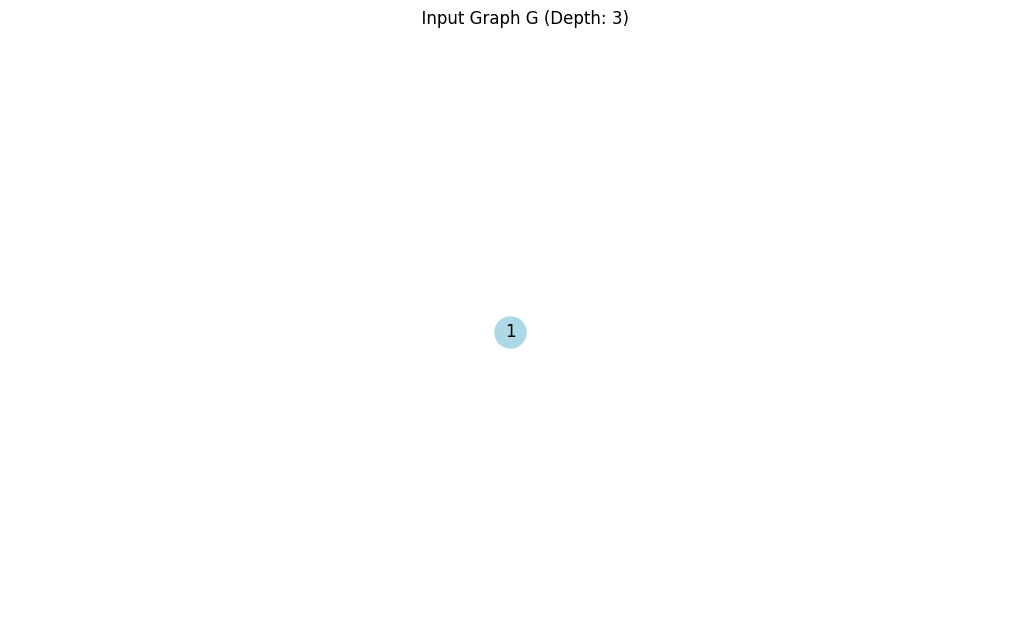

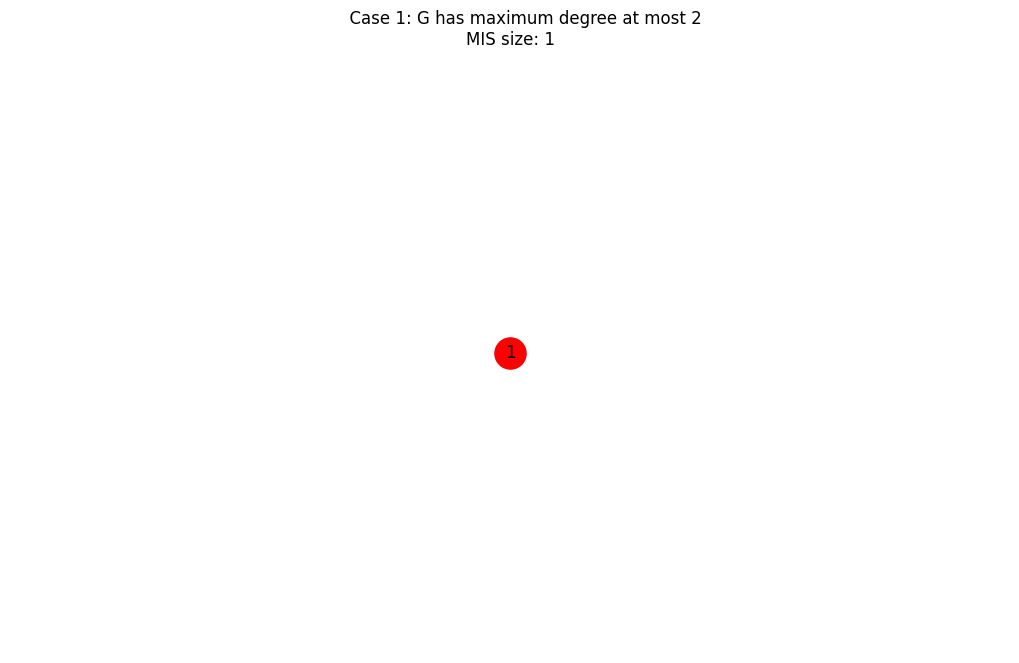

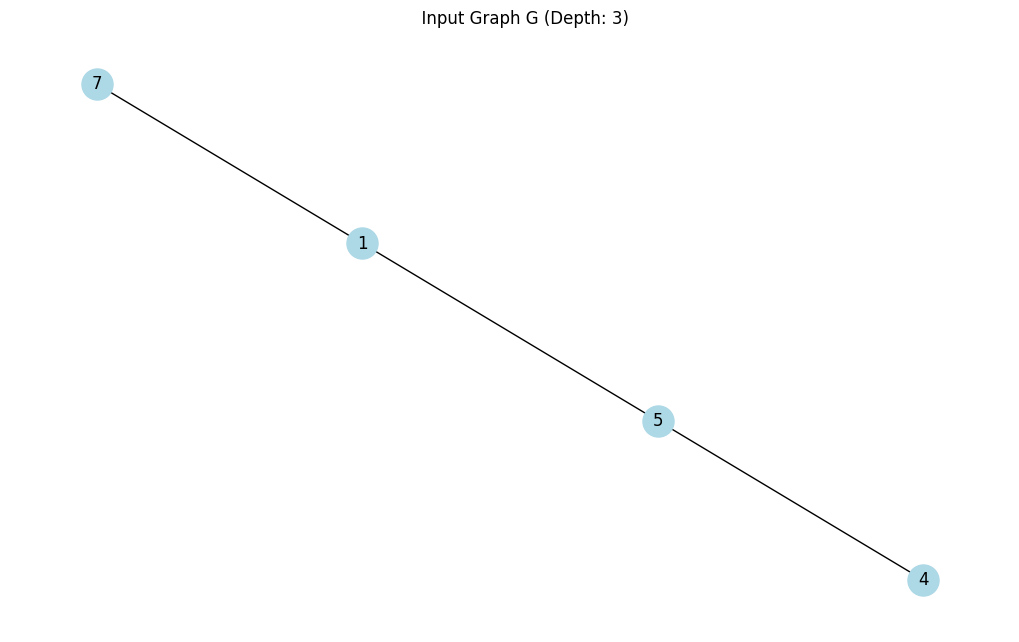

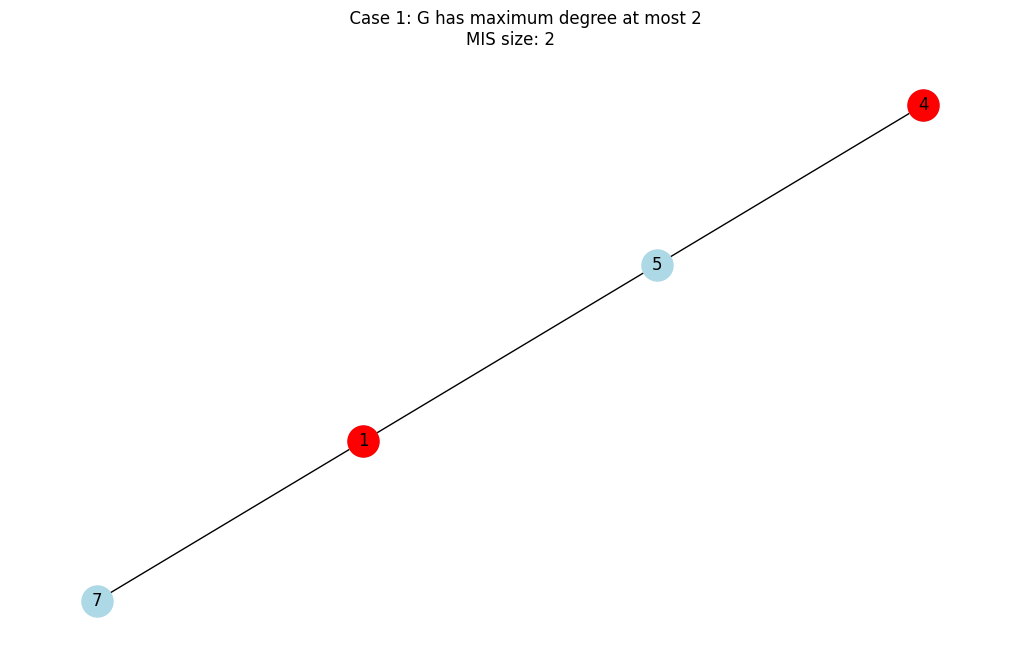

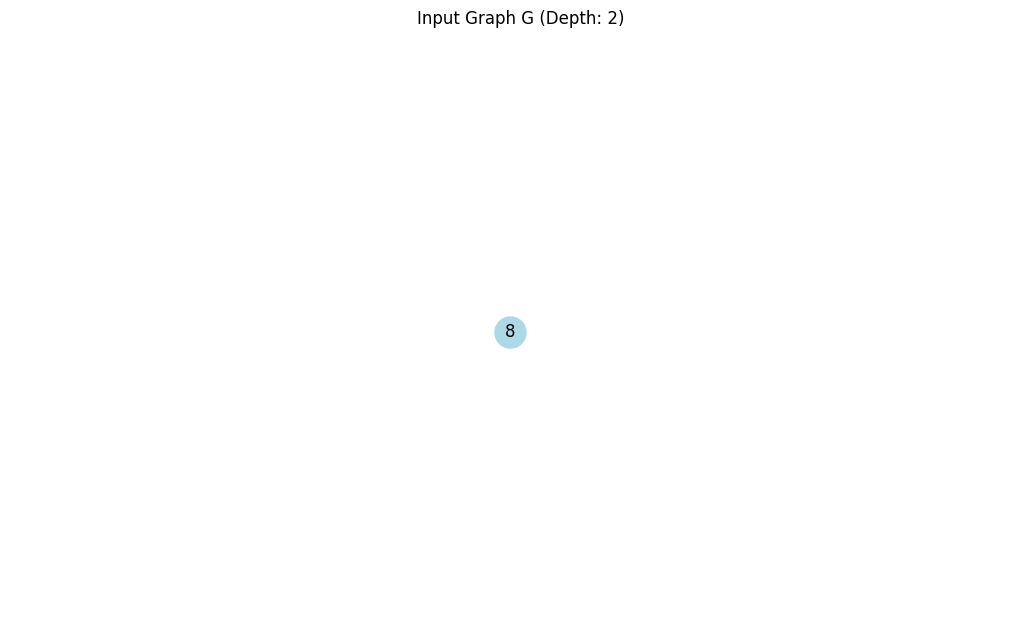

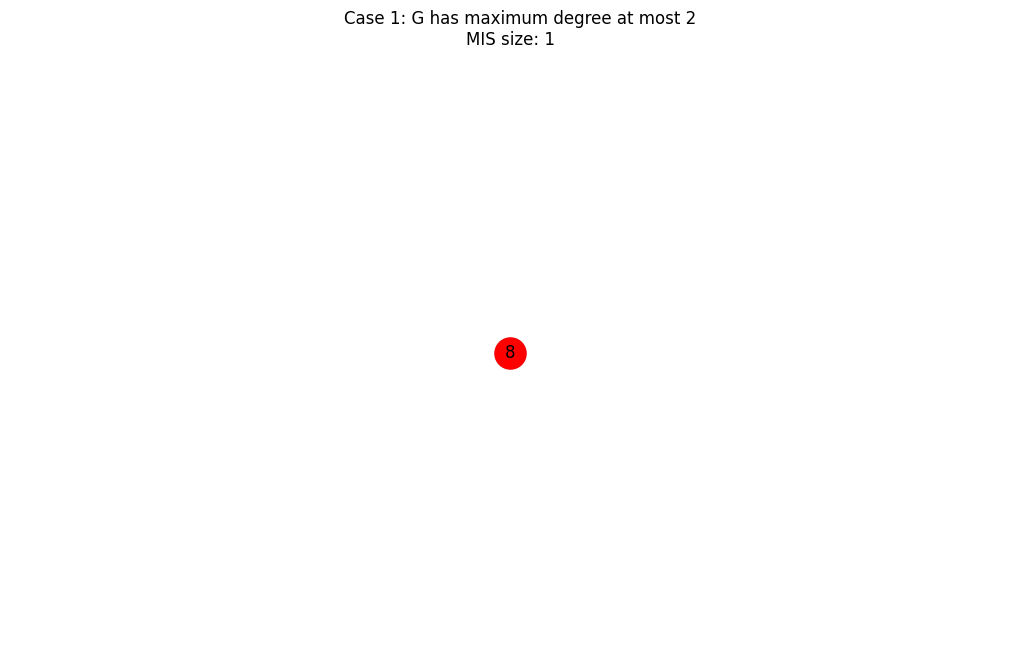

Size of maximum independent set: 4
Nodes in the maximum independent set: {8, 1, 3, 4}


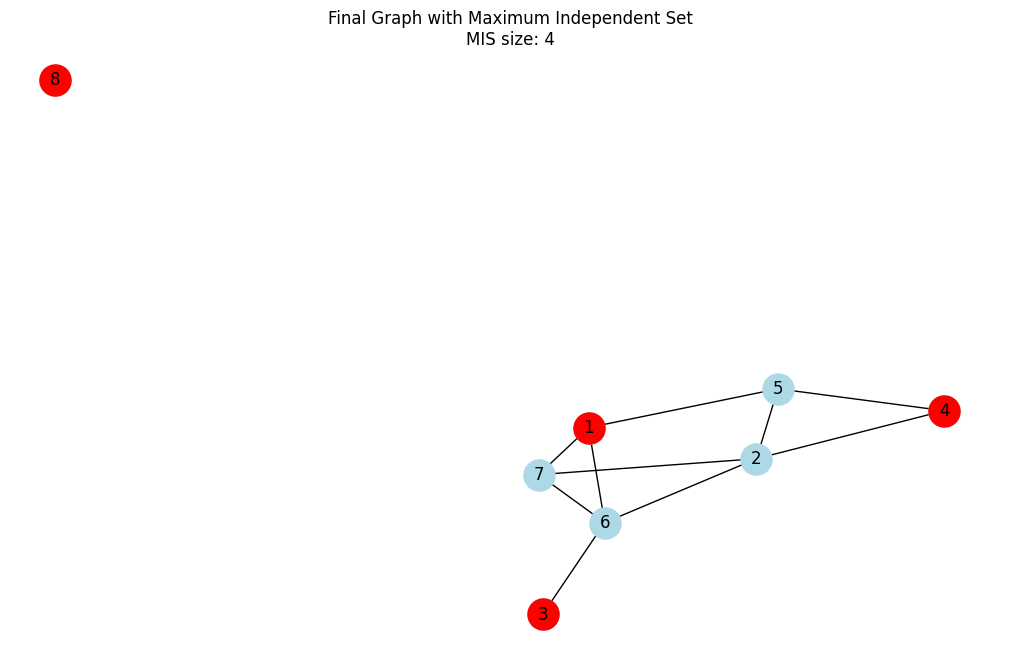

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_random_graph(num_nodes, edge_probability):
    G = nx.Graph()
    G.add_nodes_from(range(1, num_nodes + 1))
    for i in range(1, num_nodes + 1):
        for j in range(i + 1, num_nodes + 1):
            if random.random() < edge_probability:
                G.add_edge(i, j)
    return G

def visualize_graph(G, title, selected_nodes=None):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    if selected_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=selected_nodes, node_color='red', node_size=500)
    plt.title(title)
    plt.show()

def mis(G, depth=0):
    def find_mis_degree2(G):
        mis = set()
        visited = set()
        for node in G.nodes():
            if node not in visited:
                mis.add(node)
                visited.add(node)
                visited.update(G.neighbors(node))
        return mis

    indent = "  " * depth
    visualize_graph(G, f"{indent}Input Graph G (Depth: {depth})")

    if max(dict(G.degree()).values()) <= 2:
        mis_set = find_mis_degree2(G)
        visualize_graph(G, f"{indent}Case 1: G has maximum degree at most 2\nMIS size: {len(mis_set)}", mis_set)
        return mis_set

    degree_one_nodes = [n for n, d in G.degree() if d == 1]
    if degree_one_nodes:
        v = degree_one_nodes[0]
        G_minus_N_v = G.copy()
        G_minus_N_v.remove_nodes_from(list(G.neighbors(v)) + [v])
        visualize_graph(G, f"{indent}Case 2: Node {v} has degree 1", [v])
        return {v} | mis(G_minus_N_v, depth + 1)

    if not nx.is_connected(G):
        components = list(nx.connected_components(G))
        G1 = G.subgraph(components[0])
        G_minus_G1 = G.copy()
        G_minus_G1.remove_nodes_from(components[0])
        visualize_graph(G, f"{indent}Case 3: G is not connected", components[0])
        return mis(G1, depth + 1) | mis(G_minus_G1, depth + 1)

    max_degree_node = max(G.degree(), key=lambda x: x[1])[0]
    G_minus_N_v = G.copy()
    G_minus_N_v.remove_nodes_from(list(G.neighbors(max_degree_node)) + [max_degree_node])
    G_minus_v = G.copy()
    G_minus_v.remove_node(max_degree_node)
    
    visualize_graph(G, f"{indent}Case 4: Selected node {max_degree_node} with maximum degree", [max_degree_node])
    
    set1 = {max_degree_node} | mis(G_minus_N_v, depth + 1)
    set2 = mis(G_minus_v, depth + 1)
    return set1 if len(set1) > len(set2) else set2

# Example usage
num_nodes = 8
edge_probability = 0.3

G = generate_random_graph(num_nodes, edge_probability)
visualize_graph(G, f"Random Graph (n={num_nodes}, p={edge_probability})")

result = mis(G)
print(f"Size of maximum independent set: {len(result)}")
print(f"Nodes in the maximum independent set: {result}")

# Final visualization
visualize_graph(G, f"Final Graph with Maximum Independent Set\nMIS size: {len(result)}", result)